In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import spotipy
import json

#import google
from google.cloud import bigquery
from google.oauth2 import service_account
from spot import client_id
from spot import client_secret
from spotipy.oauth2 import SpotifyClientCredentials 

In [2]:
# Settings to use bigquery into python
credentials = service_account.Credentials.from_service_account_file(
    'My First Project-644ed84a506c.json')

project_id = 'hazel-proxy-246313'
client = bigquery.Client(credentials= credentials,project=project_id)

## Graph 1
### Monthly growth of records

Hola mundo!

In [3]:
df1 = client.query("""
  SELECT 
  EXTRACT(YEAR FROM listened_at) AS YEAR, 
  EXTRACT(MONTH FROM listened_at) AS MONTH, 
  COUNT(*) AS COUNT
FROM `listenbrainz.listenbrainz.listen`
WHERE EXTRACT(YEAR FROM listened_at)>=2005
GROUP BY EXTRACT(YEAR FROM listened_at), EXTRACT(MONTH FROM listened_at)
""").to_dataframe()

df1.sort_values(by=['YEAR', 'MONTH'], inplace=True)
df1.reset_index(drop=True ,inplace=True)
df1.head()

,YEAR,MONTH,COUNT
0,2005,2,653289
1,2005,3,110259
2,2005,4,141374
3,2005,5,145515
4,2005,6,163206


In [4]:
# Create grouped variable : MM-YYY
df1['YEAR_MONTH'] = df1['MONTH'].apply(str) + '-' + df1['YEAR'].apply(str)

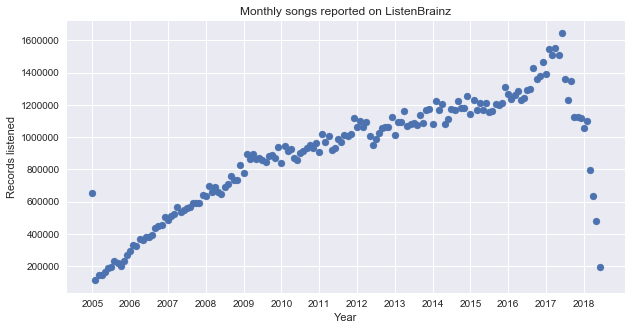

In [5]:
plt.style.use('seaborn')

plt.figure(figsize=[10, 5])
plt.scatter('YEAR_MONTH', 'COUNT', data=df1)

plt.xticks(np.arange(0,len(df1), 12), df1['YEAR'].unique())
plt.title('Monthly songs reported on ListenBrainz')
plt.xlabel('Year')
plt.ylabel('Records listened')
plt.savefig('MonthlySongs.png')
plt.show()

## Graph 2
### Popular Artists

In [6]:
df2 = client.query("""
SELECT 
  artist_name,
  COUNT(*) AS COUNT
FROM `listenbrainz.listenbrainz.listen`
GROUP BY artist_name
ORDER BY COUNT DESC
LIMIT 8
""").to_dataframe()

df2.head()

,artist_name,COUNT
0,Radiohead,582658
1,The Beatles,559065
2,Pink Floyd,440631
3,Daft Punk,414091
4,Muse,335187


In [6]:
df2.plot()

NameError: name 'df2' is not defined

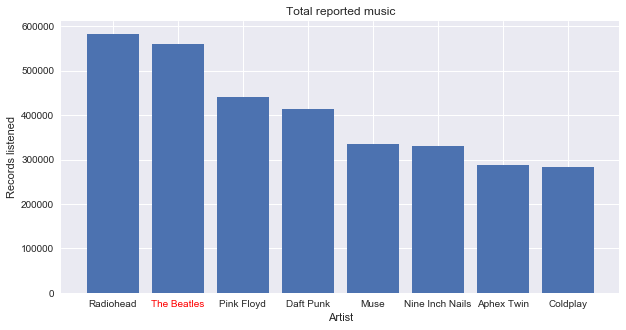

In [7]:
plt.figure(figsize=[10, 5])
plt.bar('artist_name', 'COUNT', data=df2)

plt.title('Total reported music')
plt.xlabel('Artist')
plt.ylabel('Records listened')
plt.gca().get_xticklabels()[1].set_color('red') 
plt.savefig('PopularArtists.png')
plt.show()

## Graph 3
### Radiohead's popularity

In [8]:
df3 = client.query("""
  SELECT 
  EXTRACT(YEAR FROM listened_at) AS YEAR, 
  EXTRACT(MONTH FROM listened_at) AS MONTH, 
  COUNT(*) AS Radiohead
FROM `listenbrainz.listenbrainz.listen`
WHERE EXTRACT(YEAR FROM listened_at)>=2005
AND artist_name='Radiohead'
GROUP BY EXTRACT(YEAR FROM listened_at), EXTRACT(MONTH FROM listened_at)
""").to_dataframe()

df3.sort_values(by=['YEAR', 'MONTH'], inplace=True)
df3.reset_index(drop=True, inplace=True)
df3.head()

,YEAR,MONTH,Radiohead
0,2005,2,2663
1,2005,3,333
2,2005,4,821
3,2005,5,715
4,2005,6,946


In [9]:
df3['YEAR_MONTH'] = df3['MONTH'].apply(str) + '-' + df3['YEAR'].apply(str)

df3 = pd.concat([df3, df1['COUNT']], axis=1)
df3['P_Radiohead']=df3['Radiohead']/df3['COUNT']

aux=df3[df3['P_Radiohead']==df3['P_Radiohead'].max()]
aux2=df3.sort_values('P_Radiohead', ascending=False).reset_index().iloc[1,:] #Obtain second best month

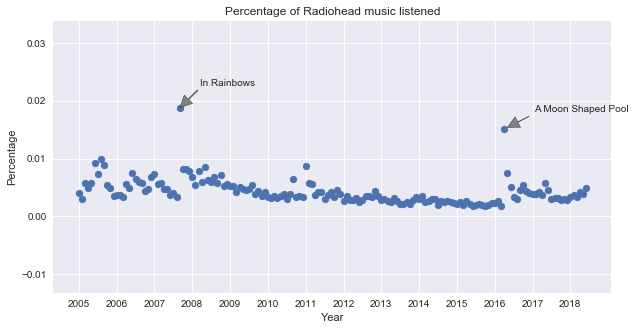

In [10]:
plt.figure(figsize=[10, 5])
plt.scatter('YEAR_MONTH', 'P_Radiohead', data=df3)

plt.xticks(np.arange(0,len(df1), 12), df3['YEAR'].unique())
plt.title('Percentage of Radiohead music listened')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.annotate('In Rainbows', 
             xy=(aux.index.tolist()[0], aux.P_Radiohead), 
             xytext=(aux.index.tolist()[0]*1.2, aux.P_Radiohead*1.2),
             arrowprops = {'facecolor':'gray', 'width': 1, 'shrink': 0.01})
plt.annotate('A Moon Shaped Pool', 
             xy=(aux2['index'], aux2.P_Radiohead), 
             xytext=(aux2['index']*1.07, aux2.P_Radiohead*1.2),
             arrowprops = {'facecolor':'gray', 'width': 0.5, 'shrink': 0.1})

plt.savefig('RadioheadPercent.png')
plt.show()

## Graph 4
### The Beatles's popularity

In [11]:
df4 = client.query("""
  SELECT 
  EXTRACT(YEAR FROM listened_at) AS YEAR, 
  EXTRACT(MONTH FROM listened_at) AS MONTH, 
  COUNT(*) AS Beatles
FROM `listenbrainz.listenbrainz.listen`
WHERE EXTRACT(YEAR FROM listened_at)>=2005
AND artist_name='The Beatles'
GROUP BY EXTRACT(YEAR FROM listened_at), EXTRACT(MONTH FROM listened_at)
""").to_dataframe()

df4.sort_values(by=['YEAR', 'MONTH'], inplace=True)
df4.reset_index(drop=True, inplace=True)
df4.head()

,YEAR,MONTH,Beatles
0,2005,2,1759
1,2005,3,307
2,2005,4,743
3,2005,5,727
4,2005,6,875


In [12]:
df4['YEAR_MONTH'] = df4['MONTH'].apply(str) + '-' + df4['YEAR'].apply(str)

df4 = pd.concat([df4, df1['COUNT']], axis=1)
df4['P_Beatles']=df4['Beatles']/df4['COUNT']

aux3=df4[df4['P_Beatles']==df4['P_Beatles'].max()]

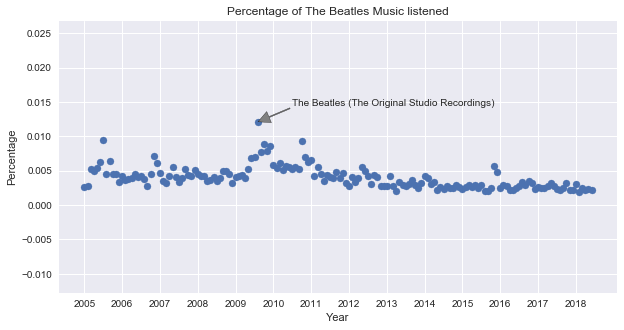

In [13]:
plt.figure(figsize=[10, 5])
plt.scatter('YEAR_MONTH', 'P_Beatles', data=df4)

plt.xticks(np.arange(0,len(df1), 12), df4['YEAR'].unique())
plt.title('Percentage of The Beatles Music listened')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.annotate('The Beatles (The Original Studio Recordings)', 
             xy=(aux3.index.tolist()[0], aux3.P_Beatles), 
             xytext=(aux3.index.tolist()[0]*1.2, aux3.P_Beatles*1.2),
             arrowprops = {'facecolor':'gray', 'width': 1, 'shrink': 0.01})
plt.savefig('BeatlesPercent.png')
plt.show()

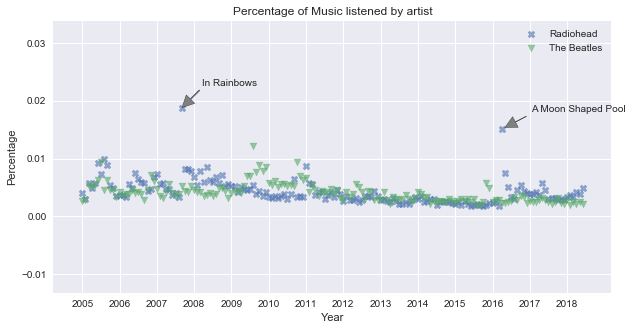

In [14]:
plt.figure(figsize=[10, 5])
plt.scatter('YEAR_MONTH', 'P_Radiohead', data=df3, alpha=0.6, marker='X')
plt.scatter('YEAR_MONTH', 'P_Beatles', data=df4, alpha=0.6, marker='v')

plt.xticks(np.arange(0,len(df1), 12), df3['YEAR'].unique())
plt.title('Percentage of Music listened by artist')
plt.legend(['Radiohead', 'The Beatles'])
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.annotate('In Rainbows', 
             xy=(aux.index.tolist()[0], aux.P_Radiohead), 
             xytext=(aux.index.tolist()[0]*1.2, aux.P_Radiohead*1.2),
             arrowprops = {'facecolor':'gray', 'width': 1, 'shrink': 0.01})
plt.annotate('A Moon Shaped Pool', 
             xy=(aux2['index'], aux2.P_Radiohead), 
             xytext=(aux2['index']*1.07, aux2.P_Radiohead*1.2),
             arrowprops = {'facecolor':'gray', 'width': 0.5, 'shrink': 0.1})

plt.savefig('ArtistsPercent.png')
plt.show()

## Table 1
### Most Reproductions per Month

In [15]:
table = client.query("""
SELECT 
  EXTRACT(YEAR FROM listened_at) AS YEAR, 
  EXTRACT(MONTH FROM listened_at) AS MONTH,
  artist_name,
  COUNT(*) AS COUNT
FROM `listenbrainz.listenbrainz.listen` AS COUNT
GROUP BY YEAR, MONTH, artist_name
ORDER BY COUNT DESC
LIMIT 10
""").to_dataframe()

table

,YEAR,MONTH,artist_name,COUNT
0,2016,1,David Bowie,22770
1,2013,5,Daft Punk,22367
2,2016,1,Fear of God,20937
3,2016,5,Radiohead,19413
4,2009,6,近藤浩治,19048
5,2009,5,近藤浩治,18886
6,2013,12,Lana Del Rey,18879
7,2017,4,Kendrick Lamar,17581
8,2010,1,Michael Z. Land,17253
9,2016,2,Kanye West,15620


## Graph 5
### Super Bowl's popularity

In [16]:
df5 = client.query("""
SELECT
    artist_name,
    EXTRACT(MONTH FROM listened_at) AS MONTH,
    COUNT(*) AS COUNT
FROM `listenbrainz.listenbrainz.listen` AS COUNT
WHERE (artist_name="Madonna" AND EXTRACT(YEAR FROM listened_at)=2012)
    OR (artist_name="Beyoncé" AND EXTRACT(YEAR FROM listened_at)=2013)
    OR (artist_name="Bruno Mars" AND EXTRACT(YEAR FROM listened_at)=2014)
    OR (artist_name="Katy Perry" AND EXTRACT(YEAR FROM listened_at)=2015)
    OR (artist_name="Coldplay" AND EXTRACT(YEAR FROM listened_at)=2016)
    OR (artist_name="Lady Gaga" AND EXTRACT(YEAR FROM listened_at)=2017)
GROUP BY artist_name, MONTH
ORDER BY MONTH
""").to_dataframe()

df5.head()

,artist_name,MONTH,COUNT
0,Beyoncé,1,254
1,Coldplay,1,2530
2,Bruno Mars,1,261
3,Madonna,1,1412
4,Katy Perry,1,1082


In [17]:
madonna=df5[df5['artist_name']=='Madonna']
beyonce=df5[df5['artist_name']=='Beyoncé']
mars=df5[df5['artist_name']=='Bruno Mars']
perry=df5[df5['artist_name']=='Katy Perry']
coldplay=df5[df5['artist_name']=='Coldplay']
gaga=df5[df5['artist_name']=='Lady Gaga']

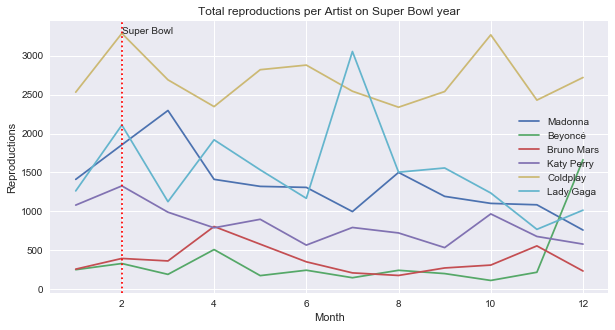

In [18]:
plt.figure(figsize=[10, 5])
plt.plot('MONTH', 'COUNT', data=madonna)
plt.plot('MONTH', 'COUNT', data=beyonce)
plt.plot('MONTH', 'COUNT', data=mars)
plt.plot('MONTH', 'COUNT', data=perry)
plt.plot('MONTH', 'COUNT', data=coldplay)
plt.plot('MONTH', 'COUNT', data=gaga)
plt.axvline(2, linestyle='dotted', color='red')
plt.text(2, df5['COUNT'].max(), 'Super Bowl')

plt.legend(['Madonna', 'Beyoncé', 'Bruno Mars', 'Katy Perry', 'Coldplay', 'Lady Gaga'], loc='best')
plt.title('Total reproductions per Artist on Super Bowl year')
plt.xlabel('Month')
plt.ylabel('Reproductions')

plt.savefig('SuperBowl.png')
plt.show()

## Graphic 6
### Valentine's Day

In [19]:
df6 = client.query("""
SELECT  
  artist_name,
COUNT(DISTINCT user_name) AS USERCOUNT,
  COUNT(*) AS COUNT
FROM `listenbrainz.listenbrainz.listen` AS COUNT
WHERE EXTRACT(MONTH FROM listened_at)=2 AND EXTRACT(DAY FROM listened_at)=14
GROUP BY artist_name
ORDER BY COUNT DESC
LIMIT 10
""").to_dataframe()

df6

,artist_name,USERCOUNT,COUNT
0,Kanye West,141,3070
1,Radiohead,250,1460
2,The Beatles,193,1394
3,Daft Punk,194,1232
4,Pink Floyd,181,1196
5,Muse,154,888
6,Aphex Twin,103,871
7,Michael Z. Land,3,856
8,Nine Inch Nails,142,832
9,Coldplay,165,828


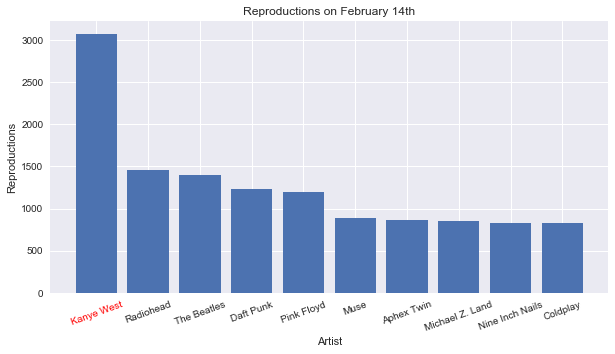

In [20]:
plt.figure(figsize=[10, 5])
plt.bar('artist_name', 'COUNT', data=df6)

plt.title('Reproductions on February 14th')
plt.xlabel('Artist')
plt.ylabel('Reproductions')
plt.gca().get_xticklabels()[0].set_color('red') 
plt.xticks(rotation=20)
plt.savefig('ValentinesDay.png')

plt.show()

## Table 2
### Best in 2017 (last complete year)

In [21]:
table = client.query("""
SELECT 
  track_name, 
  artist_name,
  COUNT(*) AS COUNT
FROM `listenbrainz.listenbrainz.listen` AS COUNT
WHERE EXTRACT(YEAR FROM listened_at)=2017
GROUP BY track_name, artist_name
ORDER BY COUNT DESC
LIMIT 500
""").to_dataframe()

table.head()

,track_name,artist_name,COUNT
0,HUMBLE.,Kendrick Lamar,4804
1,Green Light,Lorde,4644
2,Shape of You,Ed Sheeran,4595
3,Dead End in Tokyo,Man with a Mission,4242
4,DNA.,Kendrick Lamar,4058


## Spotify connection

In [22]:
sp = spotipy.Spotify() 
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False

In [23]:
#To look out for the different ids
ids=[]
c=0
for i in table["track_name"]:
    result = sp.search(i)
    try:
        result2 = result["tracks"]["items"][0]["uri"]
        ids.append(result2)
    except:
        c+=1
ids[0:10]

['spotify:track:7KXjTSCq5nL1LoYtL7XAwS',
 'spotify:track:6ie2Bw3xLj2JcGowOlcMhb',
 'spotify:track:7qiZfU4dY1lWllzX7mPBI3',
 'spotify:track:14ac6aHzcctDpFavqiznad',
 'spotify:track:6HZILIRieu8S0iqY8kIKhj',
 'spotify:track:3kSXn1osC89W8JcPLozTzs',
 'spotify:track:4EAV2cKiqKP5UPZmY6dejk',
 'spotify:track:4BxHhAk652TdrMaAZgDebi',
 'spotify:track:6RRU7vpHFbbR7oYc9zAq71',
 'spotify:track:3T1jtaY3CiT0ddt23HiAJk']

In [24]:
# To obtain interesting metrics about songs
danceability=[]
acousticness=[]
energy=[]
valence=[]
c2=0
for tid in ids:
    result = sp.audio_features(tid)
    try:
        danceability.append(result[0]["danceability"])
        acousticness.append(result[0]["acousticness"])
        energy.append(result[0]["energy"])
        valence.append(result[0]["valence"])
    except:
        c2+=1


In [25]:
n=20
dfa=pd.DataFrame({'Level':danceability[0:n], 'Metric':['Danceability']*n})
dfb=pd.DataFrame({'Level':acousticness[0:n], 'Metric':['Acousticness']*n})
dfc=pd.DataFrame({'Level':energy[0:n], 'Metric':['Energy']*n})
dfd=pd.DataFrame({'Level':valence[0:n], 'Metric':['Happiness']*n})

df7 = pd.concat([dfa, dfb, dfc, dfd]).reset_index(drop=True)
df7.head()

,Level,Metric
0,0.908,Danceability
1,0.594,Danceability
2,0.825,Danceability
3,0.567,Danceability
4,0.638,Danceability


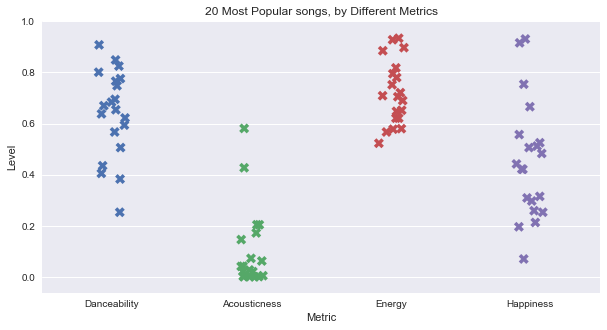

In [26]:
plt.figure(figsize=[10, 5])
sns.stripplot(x="Metric", y="Level", data=df7, jitter=True, marker='X', size=10)
plt.title('20 Most Popular songs, by Different Metrics')

plt.savefig('SongsMetrics.png')
plt.show()